In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

#### Reading the data

In [2]:
data_file = r"sample_1.pkl"
data = pd.read_pickle(data_file)
data["dx"] = data["x"].diff()
data["dy"] = data["y"].diff()

data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)


#### Plotting data statistics

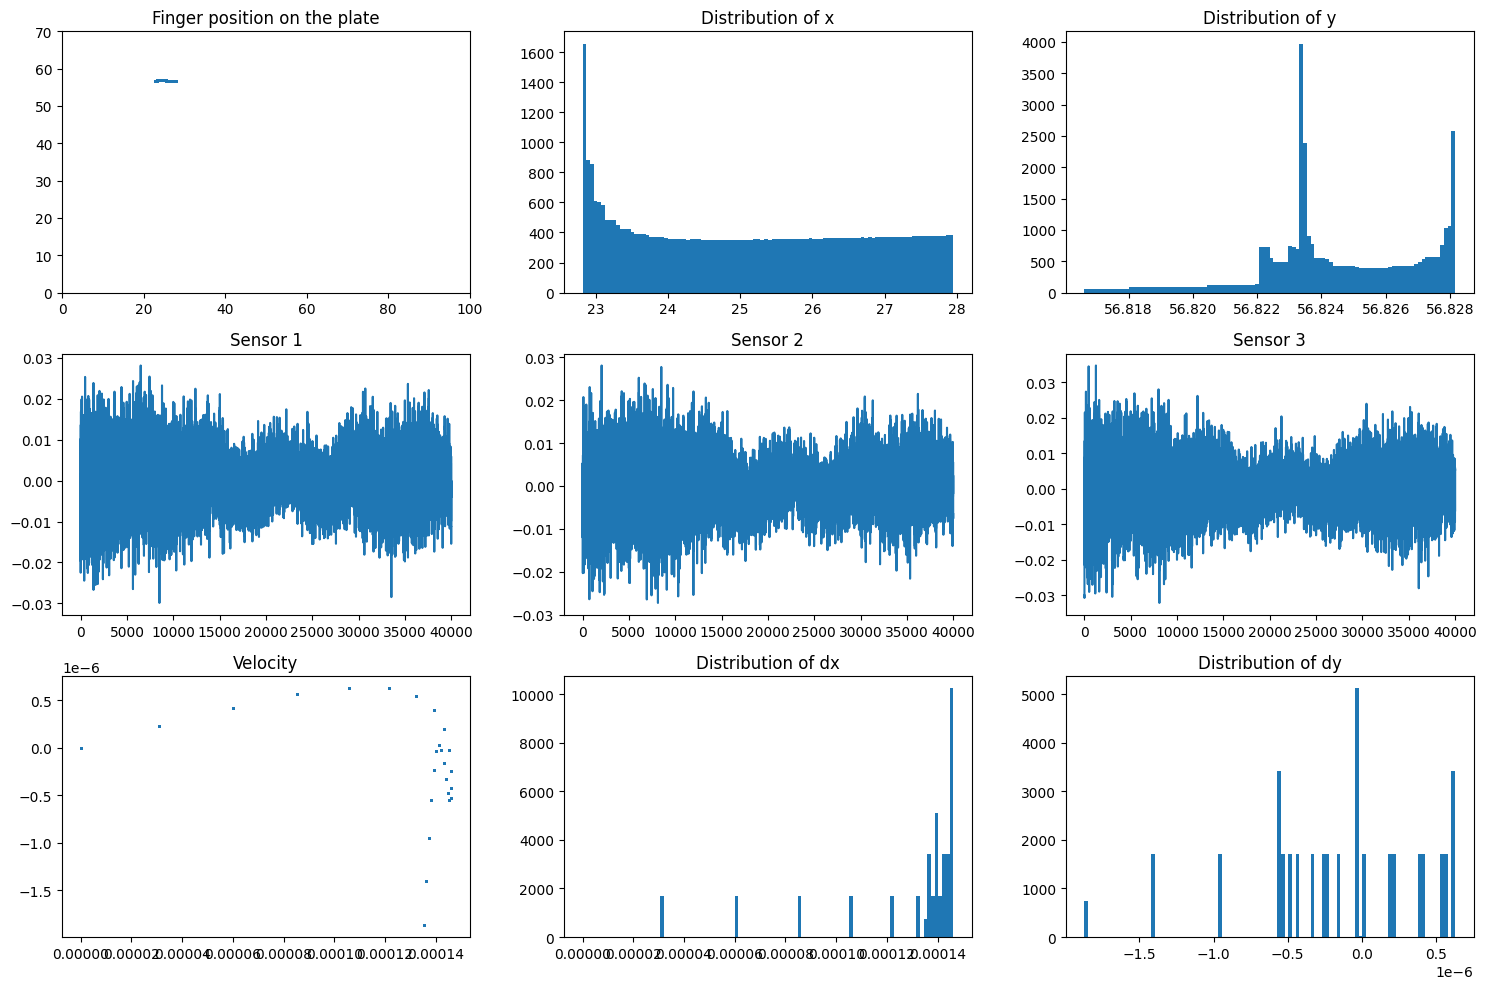

In [3]:
fig, ax = plt.subplots(3,3 , figsize=(15,10))
ax = ax.ravel()
k = 40000

ax[0].scatter(data['x'][:k], data['y'][:k], s=1)
ax[0].set_title('Finger position on the plate')
ax[0].set_xlim(0, 100)
ax[0].set_ylim(0, 70)

ax[1].hist(data['x'][:k], bins=100)
ax[1].set_title('Distribution of x')

ax[2].hist(data['y'][:k], bins=100)
ax[2].set_title('Distribution of y')


ax[3].plot(data['sensor_1'][:k], label='x')
ax[3].set_title('Sensor 1')

ax[4].plot(data['sensor_2'][:k], label='y')
ax[4].set_title('Sensor 2')

ax[5].plot(data['sensor_3'][:k], label='z')
ax[5].set_title('Sensor 3')

ax[6].scatter(data['dx'][:k], data['dy'][:k], s=1)
ax[6].set_title('Velocity')

ax[7].hist(data['dx'][:k], bins=100)
ax[7].set_title('Distribution of dx')

ax[8].hist(data['dy'][:k], bins=100)
ax[8].set_title('Distribution of dy')


fig.tight_layout()



#### Bestemmer parametere

In [4]:
window_length = 1000

#### Creating new data with the new length and dx and dy

In [5]:
columns = ["sensor_1", "sensor_2", "sensor_3", "dx", "dy"]
training_data = pd.DataFrame(columns=columns)
number_of_windows = int(len(data)/window_length)
mean = []

for i in tqdm(range(number_of_windows)):
    start = i*window_length
    end = (i+1)*window_length
    window = data[start:end]
    dx = window['dx'].sum()
    dy = window['dy'].sum()
    mean_curr = [window['sensor_1'].mean(), window['sensor_2'].mean(), window['sensor_3'].mean()]
    mean.append(mean_curr)
    

    training_data.loc[i] = [window['sensor_1'].values- mean_curr[0], window['sensor_2'].values- mean_curr[1], window['sensor_3'].values- mean_curr[2], dx, dy]



  0%|          | 0/9673 [00:00<?, ?it/s]

100%|██████████| 9673/9673 [00:17<00:00, 540.81it/s]


#### Plotting the mean

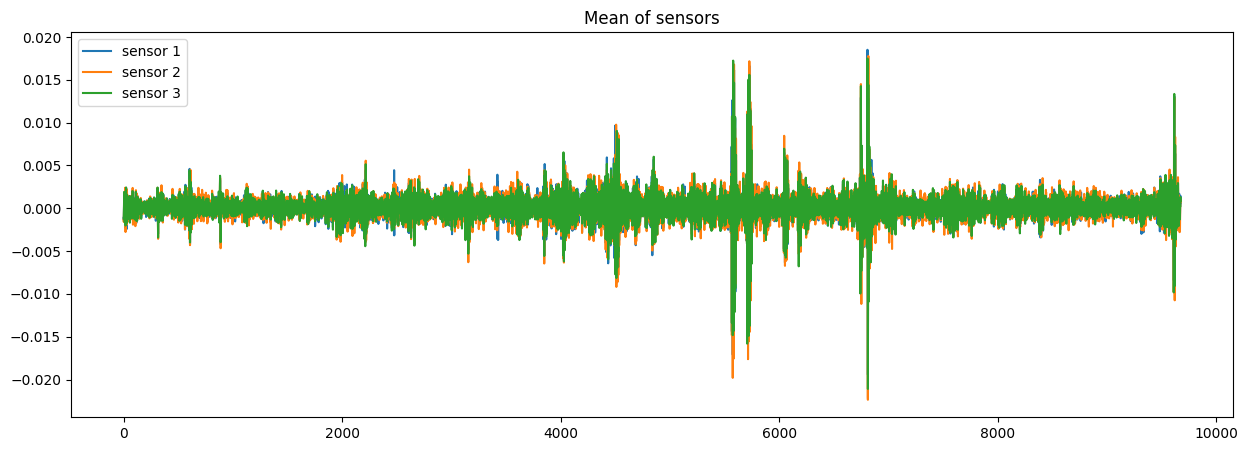

In [6]:
mean = np.array(mean)
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(mean[:,0], label='sensor 1')
ax.plot(mean[:,1], label='sensor 2')
ax.plot(mean[:,2], label='sensor 3')
ax.legend()
ax.set_title('Mean of sensors')
plt.show()


Text(0.5, 1.0, 'Distribution of dy')

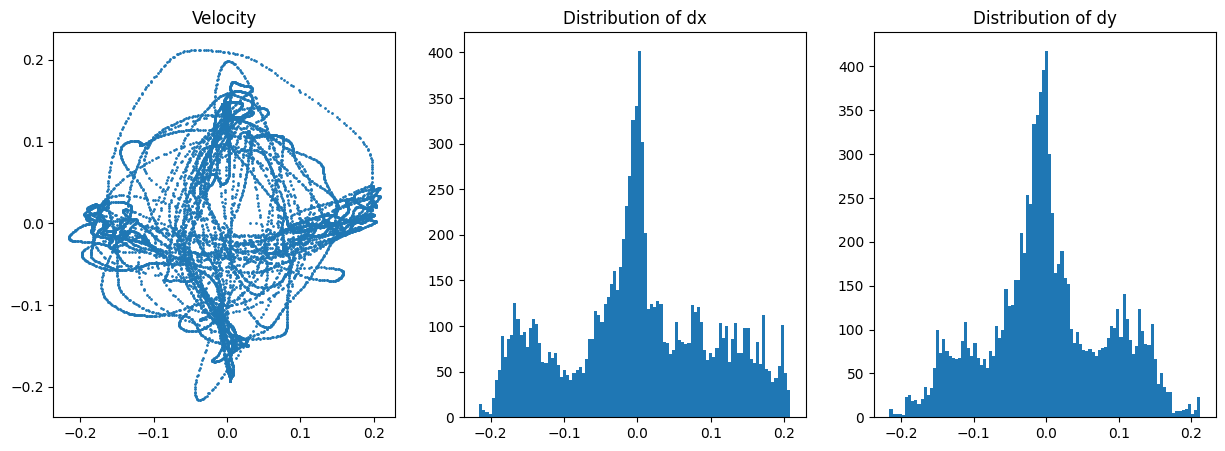

In [7]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax = ax.ravel()
ax[0].scatter(training_data['dx'], training_data['dy'], s=1)
ax[0].set_title('Velocity')

ax[1].hist(training_data['dx'], bins=100)
ax[1].set_title('Distribution of dx')

ax[2].hist(training_data['dy'], bins=100)
ax[2].set_title('Distribution of dy')


#### Storing the new training

In [8]:
# storing the training data
training_data.to_pickle(f"training_data_sample_1_window_{window_length}.pkl")

#### Plotting data statistics

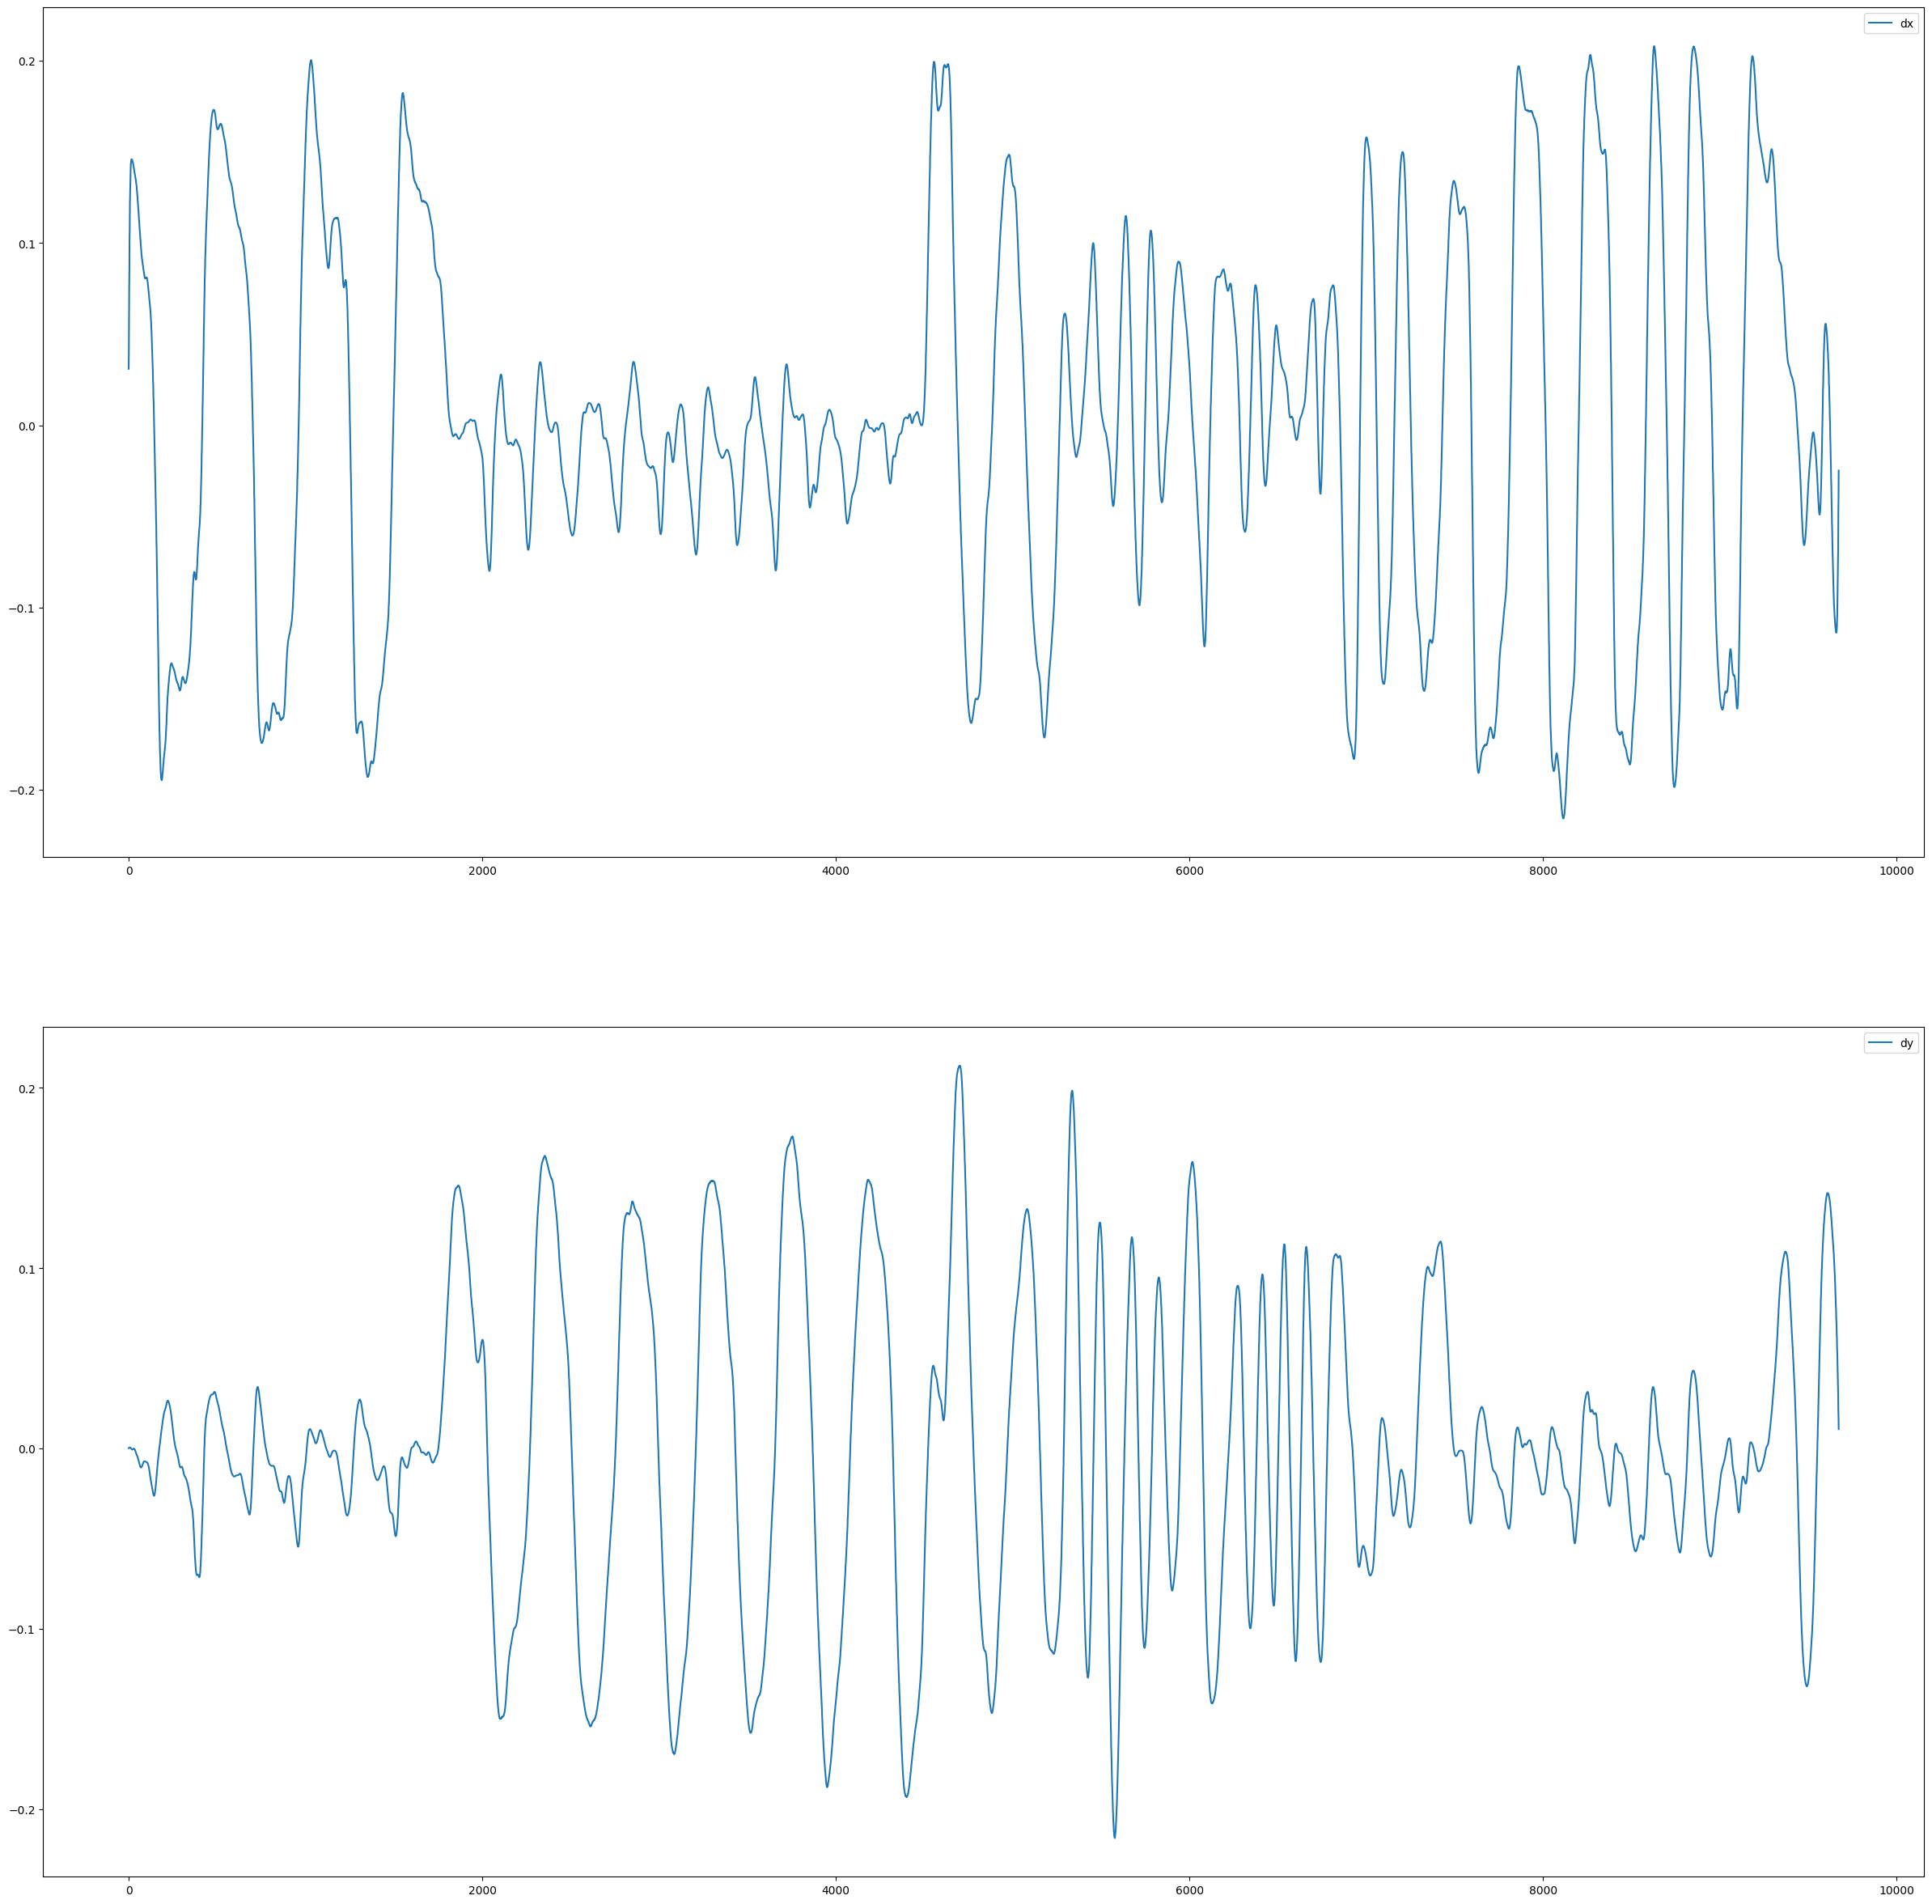

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(30, 30))

k = 100000


ax[0].plot(training_data["dx"][:k], label="dx")
ax[1].plot(training_data["dy"][:k], label="dy")

ax[0].legend()
ax[1].legend()

plt.show()


In [12]:
1/60


0.016666666666666666

In [13]:
1/120

0.008333333333333333